In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
cd /content/drive/My\ Drive/Matrix\ Transformacja/dw_matrix

/content/drive/My Drive/Matrix Transformacja/dw_matrix


In [3]:
ls data

shoes_prices.csv


In [5]:
df = pd.read_csv('data/shoes_prices.csv', low_memory=False)
df.shape

(18280, 48)

In [74]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight', 'brand_cat',
       'prices_size_cat', 'manufacturer_cat'],
      dtype='object')

In [75]:
mean_price = np.mean( df['prices_amountmin'] )
mean_price

93.53952188183217

In [91]:
df['sizes'].value_counts()

10                                         266
11                                         264
9                                          233
12                                         180
8                                          167
                                          ... 
10.5,8.5,10,7,6,9.5,7.5,9,8,13,11,12         1
Medium,large,Small                           1
13,7,7.5,8,8.5,10,10.5,11,11.5,12,9,9.5      1
10.5,9,11.5,8,13,11,12                       1
12 M,7 M,8.5 M,11.5 M                        1
Name: sizes, Length: 1075, dtype: int64

In [90]:
df['weight'].value_counts() # Tylko 81 ma wagę podaną :(

3.0 lbs       92
1.0 lbs       79
2.8 pounds    70
5.0 lbs       48
1 pounds      42
              ..
3.9 lbs        1
0.5 ounces     1
1.4 Kg         1
91 g           1
2.1 lbs        1
Name: weight, Length: 81, dtype: int64

In [83]:
# df['weight'].value_counts()

# def get_grams(weight):

#   weight, measure = weight.split(' ')

#   real_weight = 0
#   return real_weight

# df['weight_cat'] = df.weight.apply(get_grams)


# def rec(rec):
#   rec['elderly'] = np.where(rec['weight'].split(' ')[0], 'yes', 'no')
#   #rec['weight'] = .split(' ')
#   return rec['elderly']

# df.weight_cat.value_counts()
#np.vstack( (df.weight, map(rec, df) )).weight

AttributeError: ignored

In [9]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

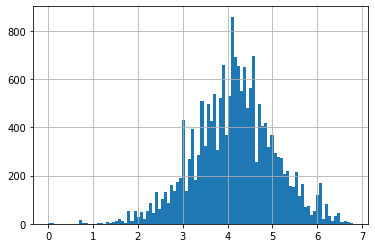

In [12]:
np.log1p( df['prices_amountmin']  ).hist(bins=100)

In [13]:
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [17]:
price_log_mean = np.expm1( np.mean( np.log1p(y_true) ) )
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
df.brand.value_counts()
df['brand_cat'] = df['brand'].factorize()[0]
df['prices_size_cat'] = df['prices_size'].factorize()[0]
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]
df['sizes_cat'] = df['sizes'].factorize()[0]
#df['count'] = df['count'].factorize()[0]

In [25]:
feats = ['brand_cat']
X = df[ feats ].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats, max_depth=50):
  X = df[ feats ].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=max_depth)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [96]:
run_model(['manufacturer_cat'])

(-58.48680807816836, 3.2876721395247697)

In [97]:
run_model(['brand_cat', 'manufacturer_cat'])

(-47.22531472731566, 3.5727237044688716)

In [98]:
run_model(['brand_cat', 'manufacturer_cat', 'prices_size_cat'])

(-46.48474176338906, 3.3493658145614176)

In [99]:
run_model(['prices_size_cat', 'brand_cat', 'manufacturer_cat'])

(-46.433274380660094, 3.234720694846235)

In [100]:
run_model(['prices_size_cat', 'brand_cat', 'manufacturer_cat', 'sizes_cat'])

(-49.519958227791314, 2.995065450886734)

In [101]:
run_model(['sizes_cat', 'prices_size_cat', 'brand_cat', 'manufacturer_cat'])

(-49.415619133218556, 2.8818605942910116)

In [0]:
!git add .

In [103]:
!git commit -m "Modele oparte o różne cechy"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@be1001ca18fb.(none)')


In [106]:
!git push

Everything up-to-date
